In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# **Data Cleaning**

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
#let's check for null values
print('\nNull values in train data:')
print(train_df.isnull().sum())
print('\nNull values in test data:')
print(test_df.isnull().sum())


Null values in train data:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Null values in test data:
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [5]:
import warnings
warnings.filterwarnings("ignore")

#handlin missing values
def process_missing_values(df):

    df_copy = df.copy()
    categorical_columns = df_copy.select_dtypes(include=['object']).columns
    numerical_columns = df_copy.select_dtypes(include=['int64', 'float64']).columns

    for col in categorical_columns:
        df_copy[col].fillna(df_copy[col].mode()[0], inplace=True)

    for col in numerical_columns:
        df_copy[col].fillna(df_copy[col].mean(), inplace=True)
    
    return df_copy

processed_train_df = process_missing_values(train_df)
processed_test_df = process_missing_values(test_df)


In [6]:
for column in train_df.columns:
    missing_count = train_df[column].isnull().sum()
    if missing_count > 0:
        percentaje = missing_count / len(train_df) * 100
        print(f'Percentage of missing values in {column} is {percentaje:.2f}% ')

Percentage of missing values in HomePlanet is 2.31% 
Percentage of missing values in CryoSleep is 2.50% 
Percentage of missing values in Cabin is 2.29% 
Percentage of missing values in Destination is 2.09% 
Percentage of missing values in Age is 2.06% 
Percentage of missing values in VIP is 2.34% 
Percentage of missing values in RoomService is 2.08% 
Percentage of missing values in FoodCourt is 2.11% 
Percentage of missing values in ShoppingMall is 2.39% 
Percentage of missing values in Spa is 2.11% 
Percentage of missing values in VRDeck is 2.16% 
Percentage of missing values in Name is 2.30% 


In [7]:
print('\nNull values in train data:')
print(processed_train_df.isnull().sum())
print('\nNull values in test data:')
print(processed_test_df.isnull().sum())


Null values in train data:
PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

Null values in test data:
PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64


## Data Visualization

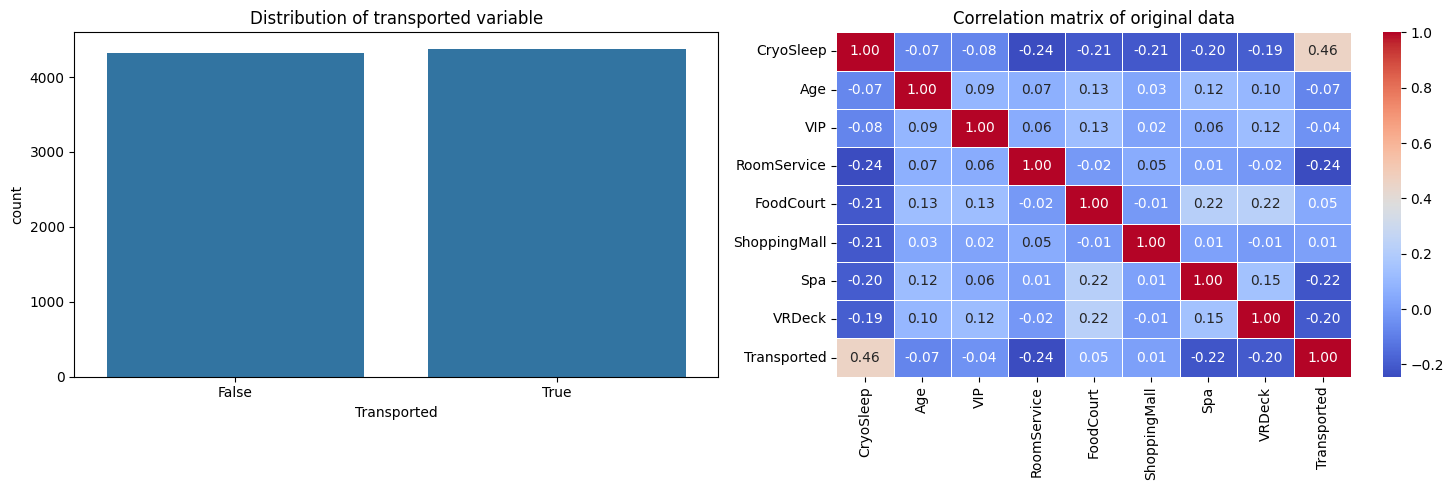

In [8]:
# Distribution of target variable

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(data=processed_train_df, x='Transported', ax=ax[0])
ax[0].set_title('Distribution of transported variable')
corr = processed_train_df[processed_train_df.dtypes[processed_train_df.dtypes != 'object'].index].corr()
sns.heatmap(corr, annot=True, ax=ax[1], cmap='coolwarm', fmt=".2f", linewidths=0.5)
ax[1].set_title('Correlation matrix of original data')
plt.tight_layout()
plt.show()



In [9]:
correlations = processed_train_df[processed_train_df.dtypes[processed_train_df.dtypes != 'object'].index].corr()['Transported'].sort_values(ascending=False)
print(correlations)

Transported     1.000000
CryoSleep       0.460132
FoodCourt       0.046074
ShoppingMall    0.010019
VIP            -0.037261
Age            -0.074249
VRDeck         -0.204825
Spa            -0.218791
RoomService    -0.242048
Name: Transported, dtype: float64


In [10]:
class FeatureVisualizer:
    def __init__(self, data):
        self.data = data
        self.fig_size = (15, 10)
        
    def plot_numerical_feature(self, feature):
        """Plot distribution of numerical features by target class in both normal and log scale"""
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=self.fig_size)
        
        # Normal scale plots
        # Histogram
        sns.histplot(data=self.data, x=feature, hue='Transported', ax=ax1)
        ax1.set_title(f'Distribution of {feature} by Transport Status')
        
        # Boxplot
        sns.boxplot(data=self.data, y=feature, x='Transported', ax=ax2)
        ax2.set_title(f'Boxplot of {feature} by Transport Status')
        
        # Log transformed plots
        # Histogram
        sns.histplot(data=self.data, x=np.log1p(self.data[feature]), hue='Transported', ax=ax3)
        ax3.set_title(f'Log Distribution of {feature} by Transport Status')
        
        # Boxplot
        sns.boxplot(data=self.data, y=np.log1p(self.data[feature]), x='Transported', ax=ax4)
        ax4.set_title(f'Log Boxplot of {feature} by Transport Status')
        
        plt.tight_layout()
        plt.show()
        
    def plot_categorical_feature(self, feature):
        """Plot distribution of categorical features by target class"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
        # Count plot
        sns.countplot(data=self.data, x=feature, hue='Transported', ax=ax1)
        ax1.set_title(f'Distribution of {feature} by Transport Status')
        ax1.tick_params(axis='x', rotation=45)
        
        # Percentage stacked bar
        prop_data = (self.data
                    .groupby(feature)['Transported']
                    .value_counts(normalize=True)
                    .unstack())
        prop_data.plot(kind='bar', stacked=True, ax=ax2)
        ax2.set_title(f'Proportion of Transport Status by {feature}')
        ax2.tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()

In [11]:
categorical_columns = processed_train_df.select_dtypes(include=['object']).columns
categorical_columns


Index(['PassengerId', 'HomePlanet', 'Cabin', 'Destination', 'Name'], dtype='object')

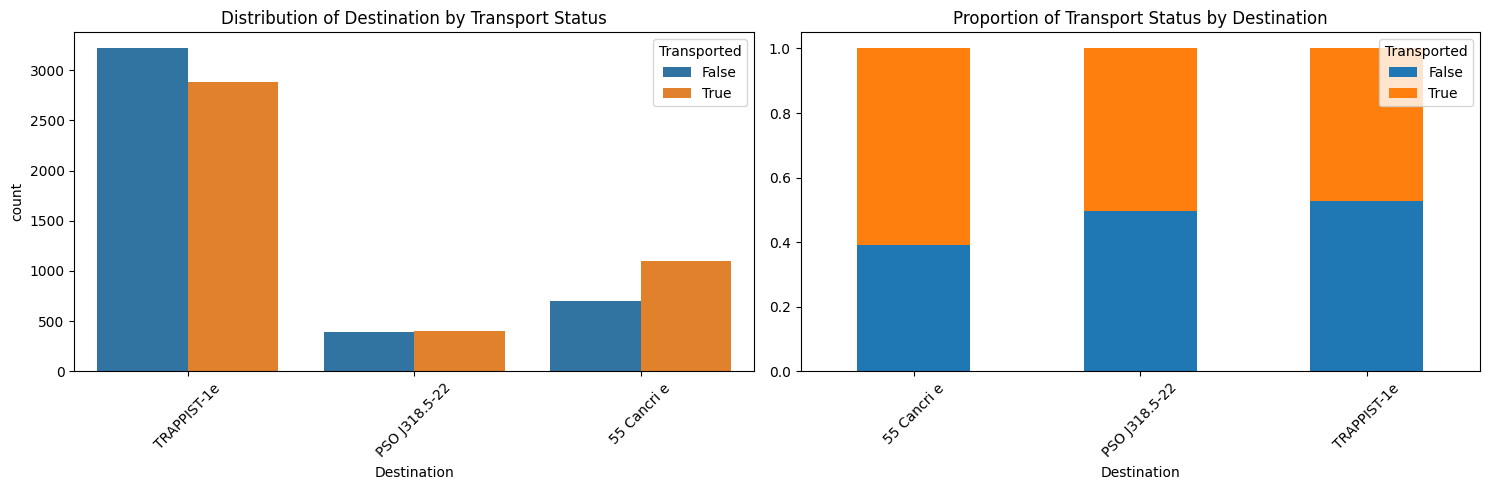

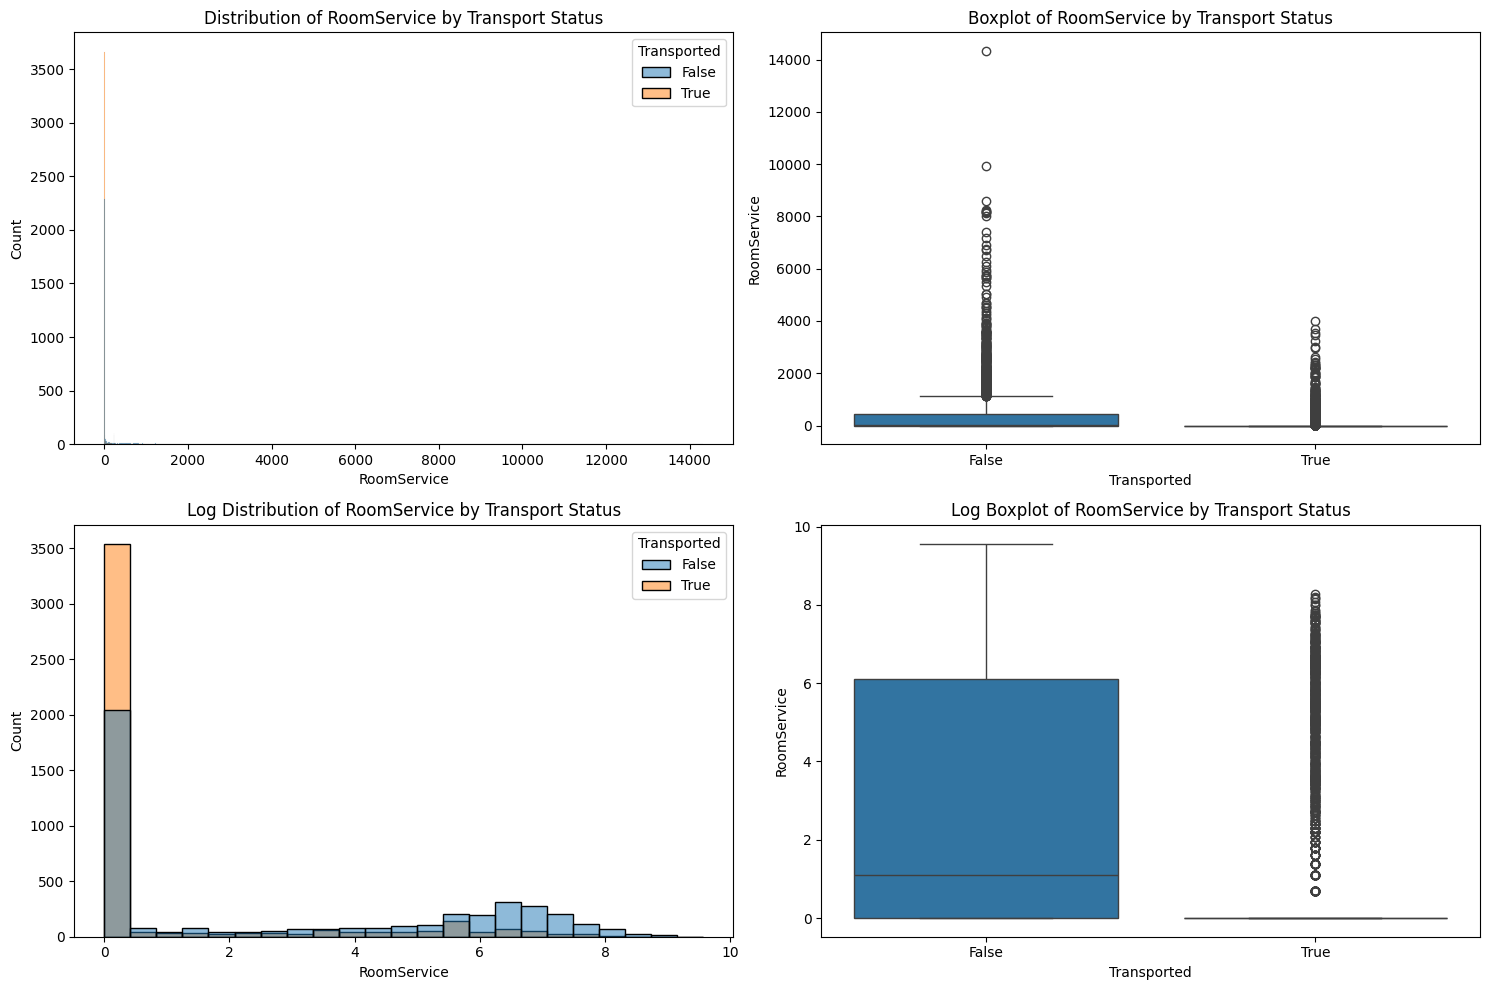

In [12]:
visualizer = FeatureVisualizer(processed_train_df)
visualizer.plot_categorical_feature('Destination')
visualizer.plot_numerical_feature('RoomService')

Age

+ Age between 0 and 18 is more likely to be transported so we can engineer this feature by creating two bins one for minors and another for adults

CryoSleep

+ CryoSleep true is more likely to be transported

FoodCourt       

+ Log transformation suits better for this feature
+ Outliers biased the distribution to the left

ShoppingMall

+ Log transformation suits better for this feature
+ Outliers biased the distribution to the left

VRDeck

+ Log transformation suits better for this feature
+ Outliers biased the distribution to the left

Spa

+ Log transformation suits better for this feature
+ Outliers biased the distribution to the left

RoomService

+ Log transformation suits better for this feature
+ Outliers biased the distribution to the left

Let's split name columns into Lastname and Firstname so that we can try to see if theres any relation for LastName with other features

## Feature Engineering

In [13]:
# Lets split name into first name and last name to find out if there are family members in the data and if that affects the target variable
processed_train_df[['FirstName', 'LastName']] = processed_train_df['Name'].str.split(n=1, expand=True)
processed_test_df[['FirstName', 'LastName']] = processed_test_df['Name'].str.split(n=1, expand=True)
processed_train_df.drop('Name', axis=1, inplace=True)
processed_test_df.drop('Name', axis=1, inplace=True)

processed_train_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,FirstName,LastName
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,Maham,Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,Juanna,Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,Altark,Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,Solam,Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,Willy,Santantines


In [14]:
# Lets split the Cabin feature so that we can analyze if there's any relation in the asignation of cabins and the target variable
processed_train_df[['Deck', 'Number', 'Side']] = processed_train_df['Cabin'].str.split('/', expand=True)
processed_test_df[['Deck', 'Number', 'Side']] = processed_test_df['Cabin'].str.split('/', expand=True)
processed_train_df.drop('Cabin', axis=1, inplace=True)
processed_test_df.drop('Cabin', axis=1, inplace=True)

processed_train_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,FirstName,LastName,Deck,Number,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,Maham,Ofracculy,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,Juanna,Vines,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,Altark,Susent,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,Solam,Susent,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,Willy,Santantines,F,1,S


In [15]:
print("Deck únicos:", processed_train_df['Deck'].unique())
print("Number únicos:", processed_train_df['Number'].unique())
print("Side únicos:", processed_train_df['Side'].unique())

Deck únicos: ['B' 'F' 'A' 'G' 'E' 'D' 'C' 'T']
Number únicos: ['0' '1' '2' ... '1892' '1893' '1894']
Side únicos: ['P' 'S']


In [16]:
# Theres not too much correlation between services variables and the target so lets unified them into a single variable
processed_train_df['Services'] = processed_train_df['RoomService'] + processed_train_df['FoodCourt'] + processed_train_df['ShoppingMall'] + processed_train_df['Spa'] + processed_train_df['VRDeck']
processed_test_df['Services'] = processed_test_df['RoomService'] + processed_test_df['FoodCourt'] + processed_test_df['ShoppingMall'] + processed_test_df['Spa'] + processed_test_df['VRDeck']
processed_train_df.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1, inplace=True)
processed_test_df.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1, inplace=True)

processed_train_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,FirstName,LastName,Deck,Number,Side,Services
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,False,Maham,Ofracculy,B,0,P,0.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,True,Juanna,Vines,F,0,S,736.0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,False,Altark,Susent,A,0,S,10383.0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,False,Solam,Susent,A,0,S,5176.0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,True,Willy,Santantines,F,1,S,1091.0


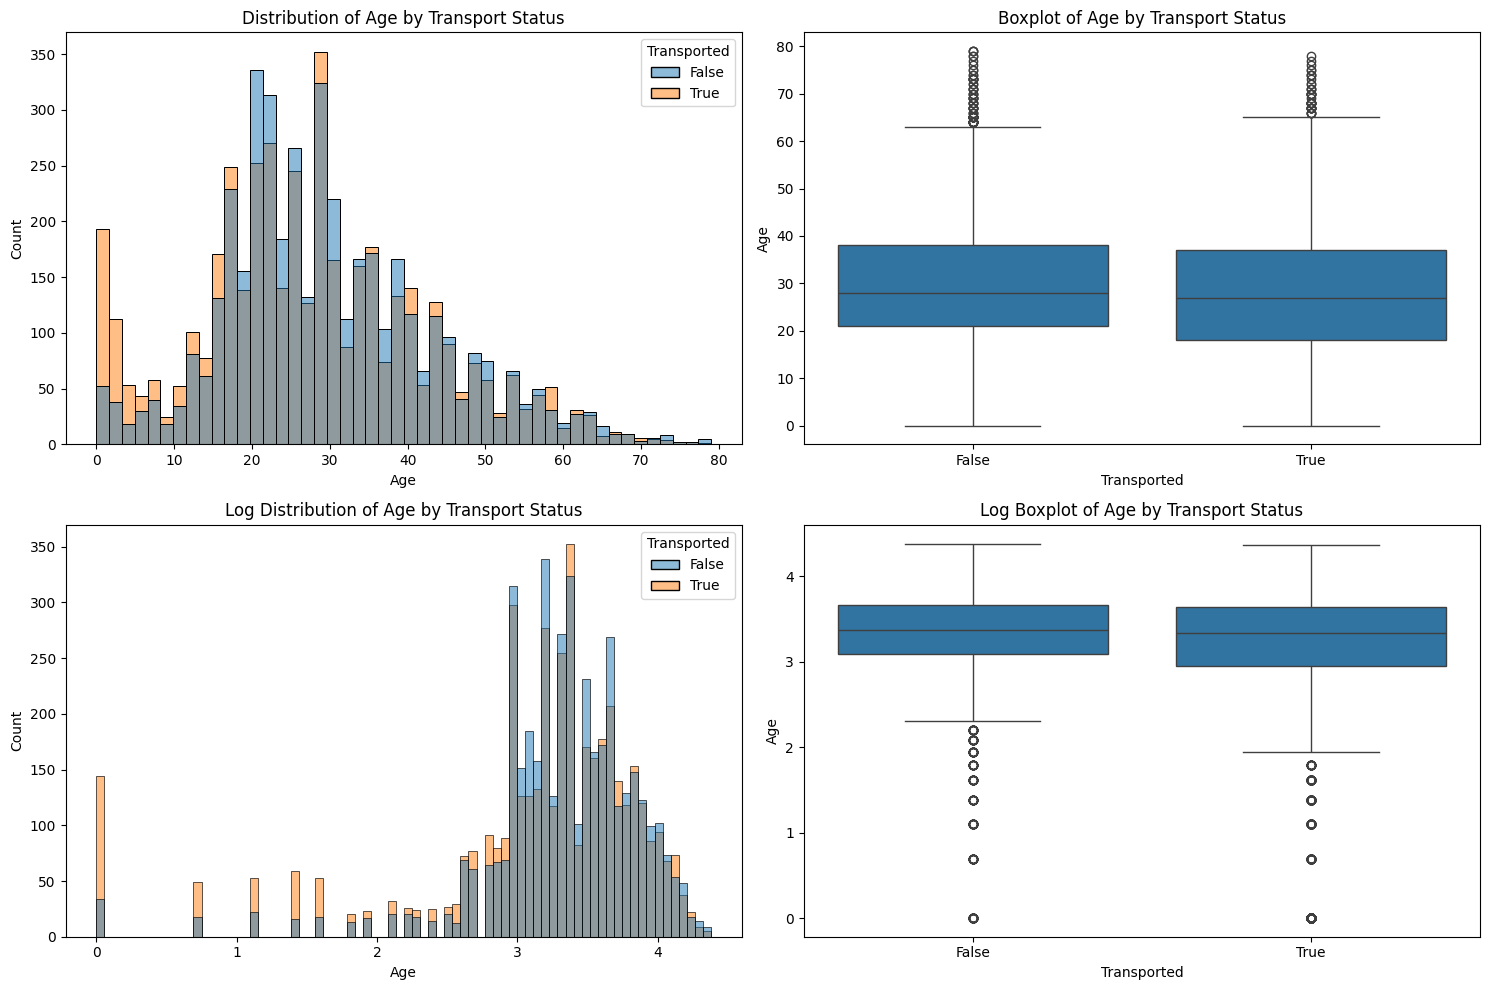

In [17]:
visualizer.plot_numerical_feature('Age')

In [18]:
# Lets create categories for range of Age since we see that range of age from 0 to 18 is more likeli to be transported
labels = ['Child', 'Teenager', 'Young Adult', 'Adult','Older Adult', 'Elderly']
bins = [0, 12, 18, 35, 50, 65, 100]
processed_train_df['GroupAge'] = pd.cut(processed_train_df['Age'], bins=bins, labels=labels, right=False)
processed_test_df['GroupAge'] = pd.cut(processed_test_df['Age'], bins=bins, labels=labels, right=False)
processed_train_df.head(5)


,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,FirstName,LastName,Deck,Number,Side,Services,GroupAge
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,False,Maham,Ofracculy,B,0,P,0.0,Adult
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,True,Juanna,Vines,F,0,S,736.0,Young Adult
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,False,Altark,Susent,A,0,S,10383.0,Older Adult
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,False,Solam,Susent,A,0,S,5176.0,Young Adult
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,True,Willy,Santantines,F,1,S,1091.0,Teenager


In [19]:
processed_train_df = processed_train_df.drop(columns='Age')
processed_test_df = processed_test_df.drop(columns='Age')
processed_train_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,Transported,FirstName,LastName,Deck,Number,Side,Services,GroupAge
0,0001_01,Europa,False,TRAPPIST-1e,False,False,Maham,Ofracculy,B,0,P,0.0,Adult
1,0002_01,Earth,False,TRAPPIST-1e,False,True,Juanna,Vines,F,0,S,736.0,Young Adult
2,0003_01,Europa,False,TRAPPIST-1e,True,False,Altark,Susent,A,0,S,10383.0,Older Adult
3,0003_02,Europa,False,TRAPPIST-1e,False,False,Solam,Susent,A,0,S,5176.0,Young Adult
4,0004_01,Earth,False,TRAPPIST-1e,False,True,Willy,Santantines,F,1,S,1091.0,Teenager


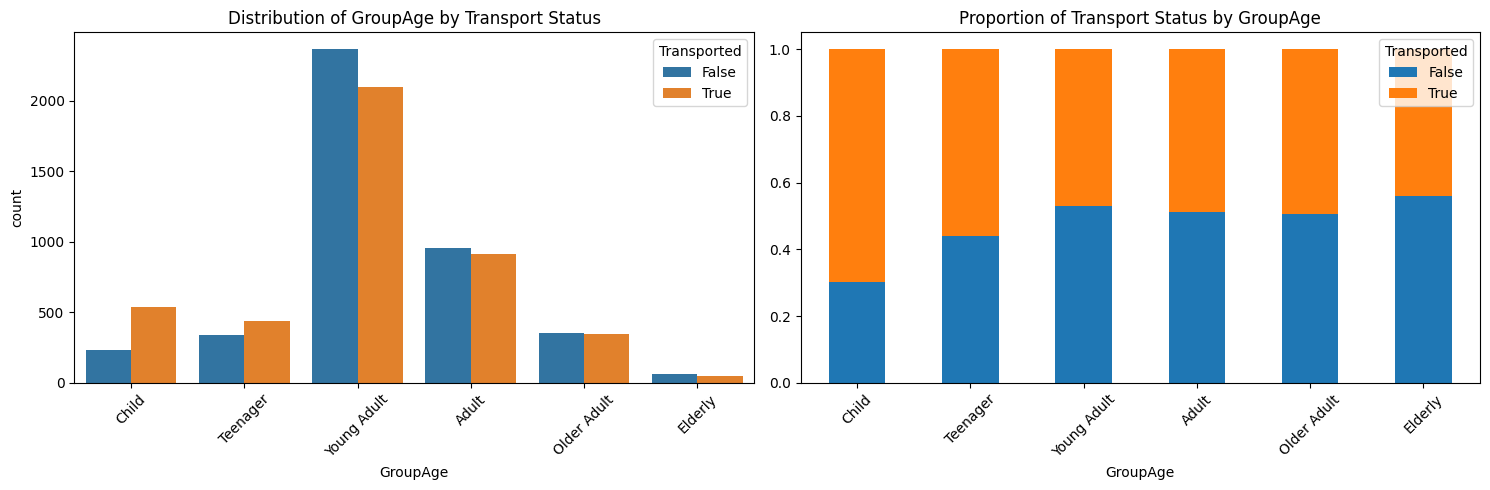

In [20]:
visualizer.plot_categorical_feature('GroupAge')

In [21]:
processed_train_df.sort_values(by='LastName')

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,Transported,FirstName,LastName,Deck,Number,Side,Services,GroupAge
6540,6905_01,Earth,False,TRAPPIST-1e,False,False,Vana,Acobson,F,1322,S,871.000000,Adult
3957,4220_01,Earth,False,TRAPPIST-1e,False,False,Tine,Acobson,E,263,P,787.000000,Young Adult
6542,6905_03,Earth,False,55 Cancri e,False,True,Gaylah,Acobson,F,1322,S,796.000000,Teenager
6541,6905_02,Earth,False,TRAPPIST-1e,False,False,Lilasa,Acobson,E,460,S,982.000000,Teenager
5307,5671_01,Earth,False,TRAPPIST-1e,False,False,Berly,Acobsond,G,907,P,1800.000000,Teenager
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3088,3328_01,Earth,False,TRAPPIST-1e,False,False,Rena,Yorkland,F,691,P,901.000000,Young Adult
595,0618_02,Earth,False,PSO J318.5-22,False,False,Troyce,Yorkland,F,131,P,757.000000,Young Adult
892,0960_01,Earth,False,TRAPPIST-1e,False,False,Lorian,Youngrayes,E,72,S,964.729169,Young Adult
2213,2369_01,Earth,False,TRAPPIST-1e,False,False,Netty,Youngrayes,F,484,P,923.000000,Young Adult


There seem to be any relation beetween the id numbers and Lastname and Homeplanet, so let's split Passenger ID

In [22]:

processed_train_df[['Id ####', 'Id ##']] = processed_train_df['PassengerId'].str.split('_', expand=True )
processed_test_df[['Id ####', 'Id ##']] = processed_test_df['PassengerId'].str.split('_', expand=True )
processed_train_df

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,Transported,FirstName,LastName,Deck,Number,Side,Services,GroupAge,Id ####,Id ##
0,0001_01,Europa,False,TRAPPIST-1e,False,False,Maham,Ofracculy,B,0,P,0.0,Adult,0001,01
1,0002_01,Earth,False,TRAPPIST-1e,False,True,Juanna,Vines,F,0,S,736.0,Young Adult,0002,01
2,0003_01,Europa,False,TRAPPIST-1e,True,False,Altark,Susent,A,0,S,10383.0,Older Adult,0003,01
3,0003_02,Europa,False,TRAPPIST-1e,False,False,Solam,Susent,A,0,S,5176.0,Young Adult,0003,02
4,0004_01,Earth,False,TRAPPIST-1e,False,True,Willy,Santantines,F,1,S,1091.0,Teenager,0004,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,True,False,Gravior,Noxnuther,A,98,P,8536.0,Adult,9276,01
8689,9278_01,Earth,True,PSO J318.5-22,False,False,Kurta,Mondalley,G,1499,S,0.0,Young Adult,9278,01
8690,9279_01,Earth,False,TRAPPIST-1e,False,True,Fayey,Connon,G,1500,S,1873.0,Young Adult,9279,01
8691,9280_01,Europa,False,55 Cancri e,False,False,Celeon,Hontichre,E,608,S,4637.0,Young Adult,9280,01


Finding out for correlations with ID ####

In [23]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(processed_train_df['HomePlanet'], processed_train_df['Id ####'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

n = np.sum(contingency_table.values)
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print(f"Crámer coeficient: {cramers_v}")
print('P:',p)


Crámer coeficient: 0.993492856053621
P: 3.2780232159698303e-159


According to Cramer coeficient it seems to be an strong relationship beetween Home Planet and LastName, Between HomePlanet end ID ####... and Beetween Id #### and last name, so, let's create a new feature that indicate us if a person belongs to a family or groupp

In [24]:
# Create new feature 'IsFamily'
processed_train_df['IsFamily'] = (
    processed_train_df.groupby(['LastName', 'Id ####', 'HomePlanet'])['LastName']
    .transform(lambda x: 1 if len(x) > 1 else 0)
)


processed_test_df['IsFamily'] = (
    processed_test_df.groupby(['LastName', 'Id ####', 'HomePlanet'])['LastName']
    .transform(lambda x: 1 if len(x) > 1 else 0)
)

# Verify Results
processed_train_df[['LastName', 'Id ####', 'HomePlanet', 'IsFamily']].head(10)

,LastName,Id ####,HomePlanet,IsFamily
0,Ofracculy,0001,Europa,0
1,Vines,0002,Earth,0
2,Susent,0003,Europa,1
3,Susent,0003,Europa,1
4,Santantines,0004,Earth,0
5,Hinetthews,0005,Earth,0
6,Jacostaffey,0006,Earth,1
7,Jacostaffey,0006,Earth,1
8,Beston,0007,Earth,0
9,Flatic,0008,Europa,1


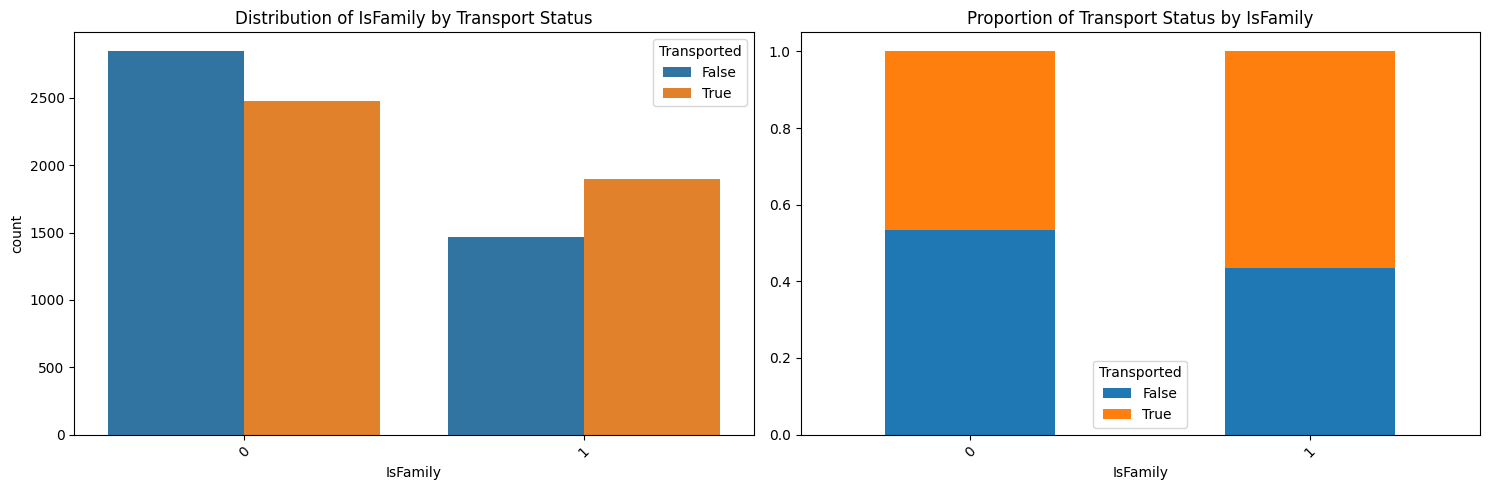

In [25]:
visualizer = FeatureVisualizer(processed_train_df)
visualizer.plot_categorical_feature('IsFamily')

In [26]:
processed_train_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,Transported,FirstName,LastName,Deck,Number,Side,Services,GroupAge,Id ####,Id ##,IsFamily
0,0001_01,Europa,False,TRAPPIST-1e,False,False,Maham,Ofracculy,B,0,P,0.0,Adult,0001,01,0
1,0002_01,Earth,False,TRAPPIST-1e,False,True,Juanna,Vines,F,0,S,736.0,Young Adult,0002,01,0
2,0003_01,Europa,False,TRAPPIST-1e,True,False,Altark,Susent,A,0,S,10383.0,Older Adult,0003,01,1
3,0003_02,Europa,False,TRAPPIST-1e,False,False,Solam,Susent,A,0,S,5176.0,Young Adult,0003,02,1
4,0004_01,Earth,False,TRAPPIST-1e,False,True,Willy,Santantines,F,1,S,1091.0,Teenager,0004,01,0


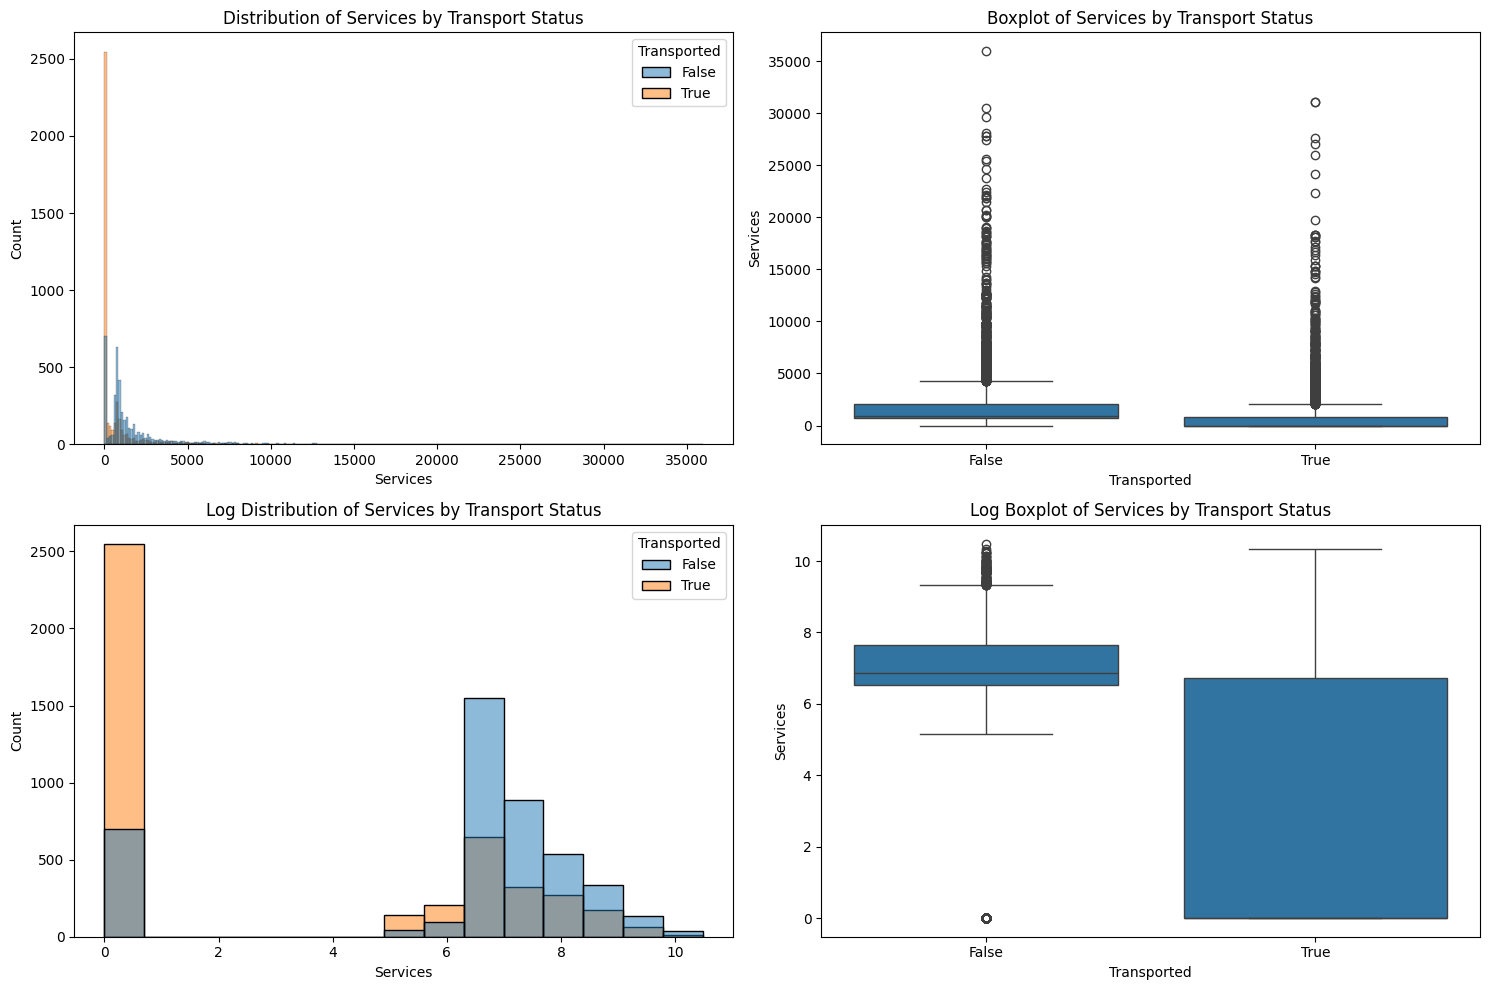

In [27]:
visualizer.plot_numerical_feature('Services')

In [27]:
processed_train_df['Services_log'] = np.log1p(processed_train_df['Services'])  
processed_test_df['Services_log'] = np.log1p(processed_test_df['Services'])

In [28]:
q1 = processed_train_df['Services_log'].quantile(0.33)
q2 = processed_train_df['Services_log'].quantile(0.66)
qmax = processed_train_df['Services_log'].max()

print(f"Quantile 33%: {q1}, Quantile 66%: {q2}, Max: {qmax}")


Quantile 33%: 0.0, Quantile 66%: 6.913661960147415, Max: 10.49094082853701


In [29]:
q1_test = processed_test_df['Services_log'].quantile(0.33)
q2_test = processed_test_df['Services_log'].quantile(0.66)
qmax_test = processed_test_df['Services_log'].max()

print(f"Quantile 33%: {q1_test}, Quantile 66%: {q2_test}, Max: {qmax_test}")

Quantile 33%: 0.0, Quantile 66%: 6.947129764372147, Max: 10.424273408096372


In [30]:
bins = [-1e-6, q1 + 1e-6, q2 + 1e-6, qmax]  # Se usa -1e-6 para incluir los ceros correctamente
labels = ['Low', 'Medium', 'High']

processed_train_df['ServiceLevel'] = pd.cut(
    processed_train_df['Services_log'], bins=bins, labels=labels, right=False
)

processed_test_df['ServiceLevel'] = pd.cut(
    processed_test_df['Services_log'], bins=bins, labels=labels, right=False
)


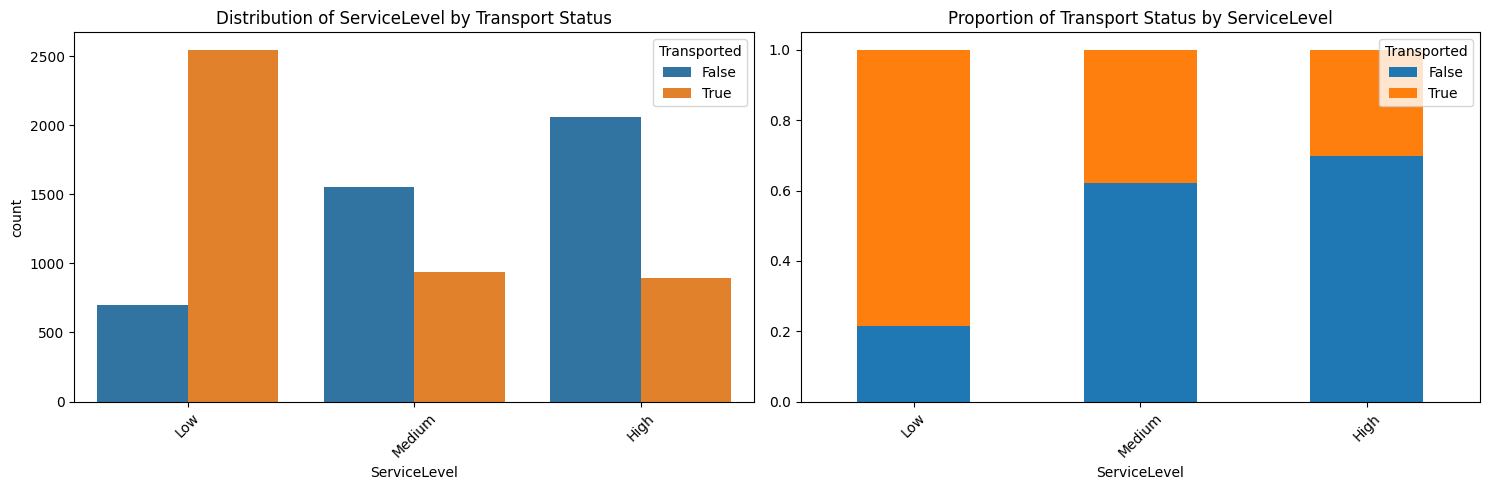

In [31]:
visualizer.plot_categorical_feature('ServiceLevel')

In [32]:
processed_train_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,Transported,FirstName,LastName,Deck,Number,Side,Services,GroupAge,Id ####,Id ##,IsFamily,Services_log,ServiceLevel
0,0001_01,Europa,False,TRAPPIST-1e,False,False,Maham,Ofracculy,B,0,P,0.0,Adult,0001,01,0,0.000000,Low
1,0002_01,Earth,False,TRAPPIST-1e,False,True,Juanna,Vines,F,0,S,736.0,Young Adult,0002,01,0,6.602588,Medium
2,0003_01,Europa,False,TRAPPIST-1e,True,False,Altark,Susent,A,0,S,10383.0,Older Adult,0003,01,1,9.248021,High
3,0003_02,Europa,False,TRAPPIST-1e,False,False,Solam,Susent,A,0,S,5176.0,Young Adult,0003,02,1,8.551981,High
4,0004_01,Earth,False,TRAPPIST-1e,False,True,Willy,Santantines,F,1,S,1091.0,Teenager,0004,01,0,6.995766,High


In [33]:
# processed_train_df.drop(columns=['Services_log', 'Id ####', 'Id ##'], inplace=True, )

In [31]:
processed_train_df[['CryoSleep', 'VIP', 'IsFamily']] = processed_train_df[['CryoSleep', 'VIP', 'IsFamily']].astype(int)
processed_test_df[['CryoSleep', 'VIP', 'IsFamily']] = processed_test_df[['CryoSleep', 'VIP', 'IsFamily']].astype(int)
processed_train_df

,PassengerId,HomePlanet,CryoSleep,Destination,VIP,Transported,FirstName,LastName,Deck,Number,Side,Services,GroupAge,Id ####,Id ##,IsFamily,Services_log,ServiceLevel
0,0001_01,Europa,0,TRAPPIST-1e,0,False,Maham,Ofracculy,B,0,P,0.0,Adult,0001,01,0,0.000000,Low
1,0002_01,Earth,0,TRAPPIST-1e,0,True,Juanna,Vines,F,0,S,736.0,Young Adult,0002,01,0,6.602588,Medium
2,0003_01,Europa,0,TRAPPIST-1e,1,False,Altark,Susent,A,0,S,10383.0,Older Adult,0003,01,1,9.248021,High
3,0003_02,Europa,0,TRAPPIST-1e,0,False,Solam,Susent,A,0,S,5176.0,Young Adult,0003,02,1,8.551981,High
4,0004_01,Earth,0,TRAPPIST-1e,0,True,Willy,Santantines,F,1,S,1091.0,Teenager,0004,01,0,6.995766,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,55 Cancri e,1,False,Gravior,Noxnuther,A,98,P,8536.0,Adult,9276,01,0,9.052165,High
8689,9278_01,Earth,1,PSO J318.5-22,0,False,Kurta,Mondalley,G,1499,S,0.0,Young Adult,9278,01,0,0.000000,Low
8690,9279_01,Earth,0,TRAPPIST-1e,0,True,Fayey,Connon,G,1500,S,1873.0,Young Adult,9279,01,0,7.535830,High
8691,9280_01,Europa,0,55 Cancri e,0,False,Celeon,Hontichre,E,608,S,4637.0,Young Adult,9280,01,1,8.442039,High


In [32]:
categorical_columns = processed_train_df.select_dtypes(include=['object', 'category']).columns
chi2_results = {}
for col in categorical_columns:
    contingency_table = pd.crosstab(processed_train_df[col], processed_train_df['Transported'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results[col] = p

pd.Series(chi2_results).sort_values()

ServiceLevel    0.000000e+00
Deck            1.150079e-80
HomePlanet      5.549632e-70
GroupAge        4.430581e-31
Destination     1.194789e-23
Side            4.006261e-21
Id ##           1.293731e-13
LastName        1.439928e-06
FirstName       3.872754e-05
Number          1.896419e-03
Id ####         6.870372e-03
PassengerId     4.949573e-01
dtype: float64

## Handling Outliers

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

processed_train_df['Service_log_norm'] = scaler.fit_transform(processed_train_df[['Services_log']])
processed_test_df['Service_log_norm'] = scaler.fit_transform(processed_test_df[['Services_log']])

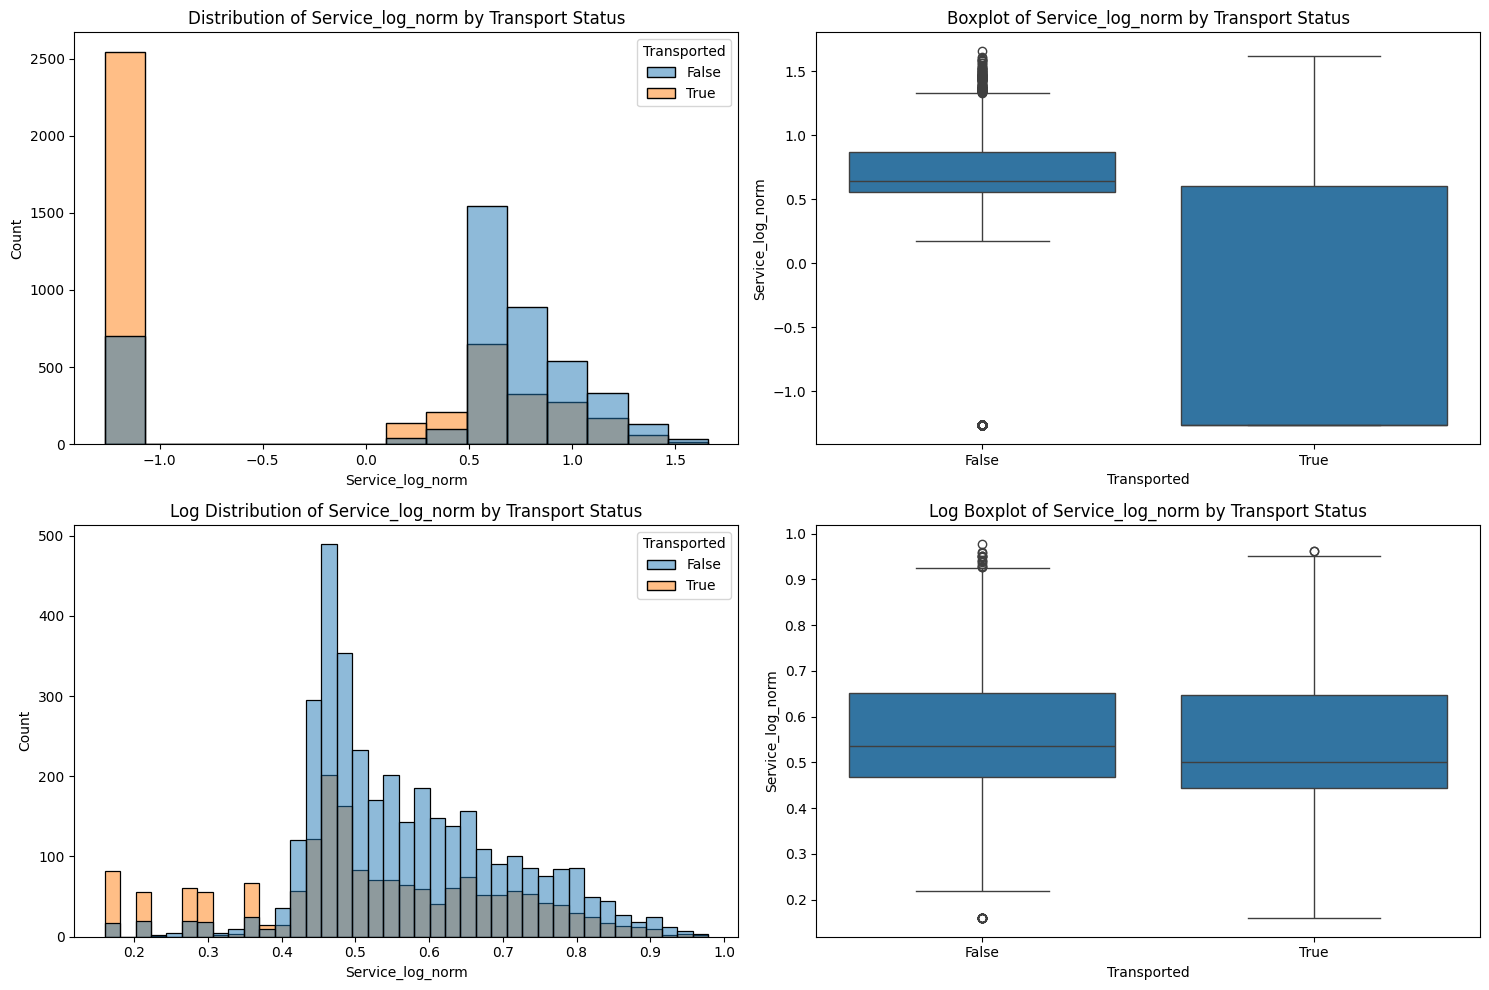

In [37]:
visualizer = FeatureVisualizer(processed_train_df)
visualizer.plot_numerical_feature('Service_log_norm')

## Preparing to modeling

In [ ]:
processed_train_df.drop(columns=['Services_log', 'Id ####', 'Id ##', 'Services', 'FirstName', 'LastName', 'Number'], inplace=True)
processed_test_df.drop(columns=['Services_log', 'Id ####', 'Id ##', 'Services', 'FirstName', 'LastName', 'Number'], inplace=True)
processed_train_df

In [35]:
processed_test_df.drop(columns=['Services_log', 'Id ####', 'Id ##', 'Services', 'FirstName', 'LastName', 'Number'], inplace=True)

In [36]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

processed_train_df['ServiceLevel'] = encoder.fit_transform(processed_train_df['ServiceLevel'])
processed_train_df['GroupAge'] = encoder.fit_transform(processed_train_df['GroupAge'])
processed_train_df = pd.get_dummies(processed_train_df, columns=['HomePlanet', 'Destination'])

processed_test_df['ServiceLevel'] = encoder.fit_transform(processed_test_df['ServiceLevel'])
processed_test_df['GroupAge'] = encoder.fit_transform(processed_test_df['GroupAge'])
processed_test_df = pd.get_dummies(processed_test_df, columns=['HomePlanet', 'Destination'])



In [37]:
processed_train_df = pd.get_dummies(processed_train_df, columns=['Deck', 'Side'])
processed_test_df = pd.get_dummies(processed_test_df, columns=['Deck', 'Side'])

In [39]:
processed_train_df

,PassengerId,CryoSleep,VIP,Transported,GroupAge,IsFamily,ServiceLevel,Service_log_norm,HomePlanet_Earth,HomePlanet_Europa,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0001_01,0,0,False,0,0,1,-1.266536,False,True,...,False,True,False,False,False,False,False,False,True,False
1,0002_01,0,0,True,5,0,2,0.574976,True,False,...,False,False,False,False,False,True,False,False,False,True
2,0003_01,0,1,False,3,1,0,1.312807,False,True,...,True,False,False,False,False,False,False,False,False,True
3,0003_02,0,0,False,5,1,0,1.118676,False,True,...,True,False,False,False,False,False,False,False,False,True
4,0004_01,0,0,True,4,0,0,0.684636,True,False,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,1,False,0,0,0,1.258182,False,True,...,True,False,False,False,False,False,False,False,True,False
8689,9278_01,1,0,False,5,0,1,-1.266536,True,False,...,False,False,False,False,False,False,True,False,False,True
8690,9279_01,0,0,True,5,0,0,0.835264,True,False,...,False,False,False,False,False,False,True,False,False,True
8691,9280_01,0,0,False,5,1,0,1.088013,False,True,...,False,False,False,False,True,False,False,False,False,True


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Definir variables independientes (X) y dependiente (y)
X = processed_train_df.drop(columns=['Transported', 'PassengerId'])
y = processed_train_df['Transported']

# Separar en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")




Accuracy: 0.70


##  Custom Transdformers

In [43]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None, log=False):
        # Verifica si X es un DataFrame
        if not isinstance(X, pd.DataFrame):
            raise TypeError('X must be a pandas DataFrame')
        return self

    def transform(self, X, y=None, log=True):
        # Verifica si X es un DataFrame
        if not isinstance(X, pd.DataFrame):
            raise TypeError('X must be a pandas DataFrame')

        # Realiza una copia de X para evitar modificar el DataFrame original
        X = X.copy()
        
        # Compara correctamente si log es False
        if log == False:
            # Aplica el método _used_services
            self._used_services(X)
        else:
            # Aplica la transformación logarítmica a las columnas correspondientes
            self._log_transform(X)
        
        return X

    def _used_services(self, X):
        # Crea la columna 'UseServices' como la suma de los servicios utilizados
        X['UseServices'] = (X['Spa'] + X['RoomService'] + X['FoodCourt'] + X['ShoppingMall'] + X['VRDeck'] > 0).astype(np.uint8)

        # Elimina las columnas originales de servicios
        X.drop(columns=['Spa', 'RoomService', 'FoodCourt', 'ShoppingMall', 'VRDeck'], inplace=True)

    def _log_transform(self, X):
        # Aplica una transformación logarítmica (log1p) a las columnas de servicios
        X[['Spa', 'RoomService', 'FoodCourt', 'ShoppingMall', 'VRDeck']] = np.log1p(X[['Spa', 'RoomService', 'FoodCourt', 'ShoppingMall', 'VRDeck']])


        

## Modeling

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# Set random seed
np.random.seed(2)

# Define models
models = {
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "ExtraTrees": ExtraTreesClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(kernel='rbf', probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "GradientBoost": GradientBoostingClassifier(),
    "NN": MLPClassifier()
}

# Initialize results storage
results = []

# Perform cross-validation
k_folds = 10
kf = KFold(n_splits=k_folds, shuffle=True, random_state=2)

for model_name, model in models.items():
    try:
        # Train and evaluate model using cross-validation
        scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
        
        # Store accuracy and standard deviation
        results.append({
            "Model_Name": model_name,
            "acc": np.mean(scores),
            "std": np.std(scores)
        })
    except Exception as e:
        print(f"Model {model_name} failed: {e}")

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print(results_df)



  File "c:\Users\Genia\OneDrive\Escritorio\trainin-data-sc\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "D:\Python\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Python\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "D:\Python\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


      Model_Name       acc       std
0   DecisionTree  0.697732  0.016339
1   RandomForest  0.704198  0.019463
2     ExtraTrees  0.694999  0.021397
3       AdaBoost  0.737418  0.019169
4            KNN  0.711104  0.014075
5            SVC  0.740293  0.012898
6        XGBoost  0.734832  0.014789
7  GradientBoost  0.747339  0.015038
8             NN  0.741302  0.009797


In [44]:
from tqdm import tqdm
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid

# Inicializar modelos
svc = SVC()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
gb = GradientBoostingClassifier()

# Definir los espacios de búsqueda de hiperparámetros
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 0.01]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

In [45]:
# # Lista de modelos con sus hiperparámetros
# models = [
#     ('SVC', svc, param_grid_svc),
#     ('XGBoost', xgb, param_grid_xgb),
#     ('Gradient Boosting', gb, param_grid_gb)
# ]

# # Almacenar los mejores hiperparámetros
# best_params = {}

# for name, model, param_grid in models:
#     print(f"\n🔍 Optimizando {name}...")

#     # Calcular el número total de combinaciones
#     total_combinations = len(list(ParameterGrid(param_grid)))

#     # Configurar GridSearchCV con barra de progreso
#     grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=0, n_jobs=-1)

#     # Crear barra de progreso con el número correcto de combinaciones
#     with tqdm(total=total_combinations, desc=f"Optimizando {name}") as pbar:
#         grid.fit(X_train, y_train)
#         pbar.update(total_combinations)  # Marcar como completado

#     best_params[name] = grid.best_params_

# # Mostrar los mejores hiperparámetros
# for model, params in best_params.items():
#     print(f"✅ Mejor configuración para {model}: {params}")

In [46]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict


stacking_model = StackingClassifier(
    estimators=[('svc', svc), ('xgb', xgb), ('gb',gb)],
    final_estimator=LogisticRegression(),
    cv=5
)

In [47]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
blended_preds = cross_val_predict(stacking_model, X_train, y_train, cv=kf)
ensemble_accuracy = accuracy_score(y_train, blended_preds)
print(f'Stacking Model Accuracy: {ensemble_accuracy:.4f}')

Stacking Model Accuracy: 0.7492


In [49]:
processed_test_df

,PassengerId,CryoSleep,VIP,GroupAge,IsFamily,ServiceLevel,Service_log_norm,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0013_01,1,0,5,0,1,-1.259275,True,False,False,...,False,False,False,False,False,False,True,False,False,True
1,0018_01,0,0,5,0,0,0.956355,True,False,False,...,False,False,False,False,False,True,False,False,False,True
2,0019_01,1,0,5,0,1,-1.259275,False,True,False,...,False,False,True,False,False,False,False,False,False,True
3,0021_01,0,0,0,0,0,1.224688,False,True,False,...,False,False,True,False,False,False,False,False,False,True
4,0023_01,0,0,5,0,2,0.544314,True,False,False,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,0,5,1,1,-1.259275,True,False,False,...,False,False,False,False,False,False,True,False,False,True
4273,9269_01,0,0,0,0,0,0.671352,True,False,False,...,False,False,False,False,False,False,True,False,True,False
4274,9271_01,1,0,5,0,1,-1.259275,False,False,True,...,False,False,False,True,False,False,False,False,True,False
4275,9273_01,0,0,5,0,0,0.990656,False,True,False,...,False,False,False,True,False,False,False,False,True,False


In [ ]:

stacking_model.fit(X, y)



StackingClassifier(cv=5,
                   estimators=[('svc', SVC()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='mlogloss',
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_c...
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('gb', GradientBoostingClassifier())],
                   final_estimator=LogisticRegression())

In [50]:
X = processed_test_df.drop(columns=['PassengerId'])

processed_test_df['Transported'] = stacking_model.predict(X)

In [53]:
processed_test_df

,PassengerId,CryoSleep,VIP,GroupAge,IsFamily,ServiceLevel,Service_log_norm,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S,Transported
0,0013_01,1,0,5,0,1,-1.259275,True,False,False,...,False,False,False,False,False,True,False,False,True,True
1,0018_01,0,0,5,0,0,0.956355,True,False,False,...,False,False,False,False,True,False,False,False,True,False
2,0019_01,1,0,5,0,1,-1.259275,False,True,False,...,False,True,False,False,False,False,False,False,True,True
3,0021_01,0,0,0,0,0,1.224688,False,True,False,...,False,True,False,False,False,False,False,False,True,False
4,0023_01,0,0,5,0,2,0.544314,True,False,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,0,5,1,1,-1.259275,True,False,False,...,False,False,False,False,False,True,False,False,True,True
4273,9269_01,0,0,0,0,0,0.671352,True,False,False,...,False,False,False,False,False,True,False,True,False,False
4274,9271_01,1,0,5,0,1,-1.259275,False,False,True,...,False,False,True,False,False,False,False,True,False,True
4275,9273_01,0,0,5,0,0,0.990656,False,True,False,...,False,False,True,False,False,False,False,True,False,False


In [54]:
submission = processed_test_df[['PassengerId', 'Transported']]
submission['Transported'] = submission['Transported'].astype(bool)
submission.to_csv('submission.csv', index=False)

print('Submission file created succesfully')

Submission file created succesfully


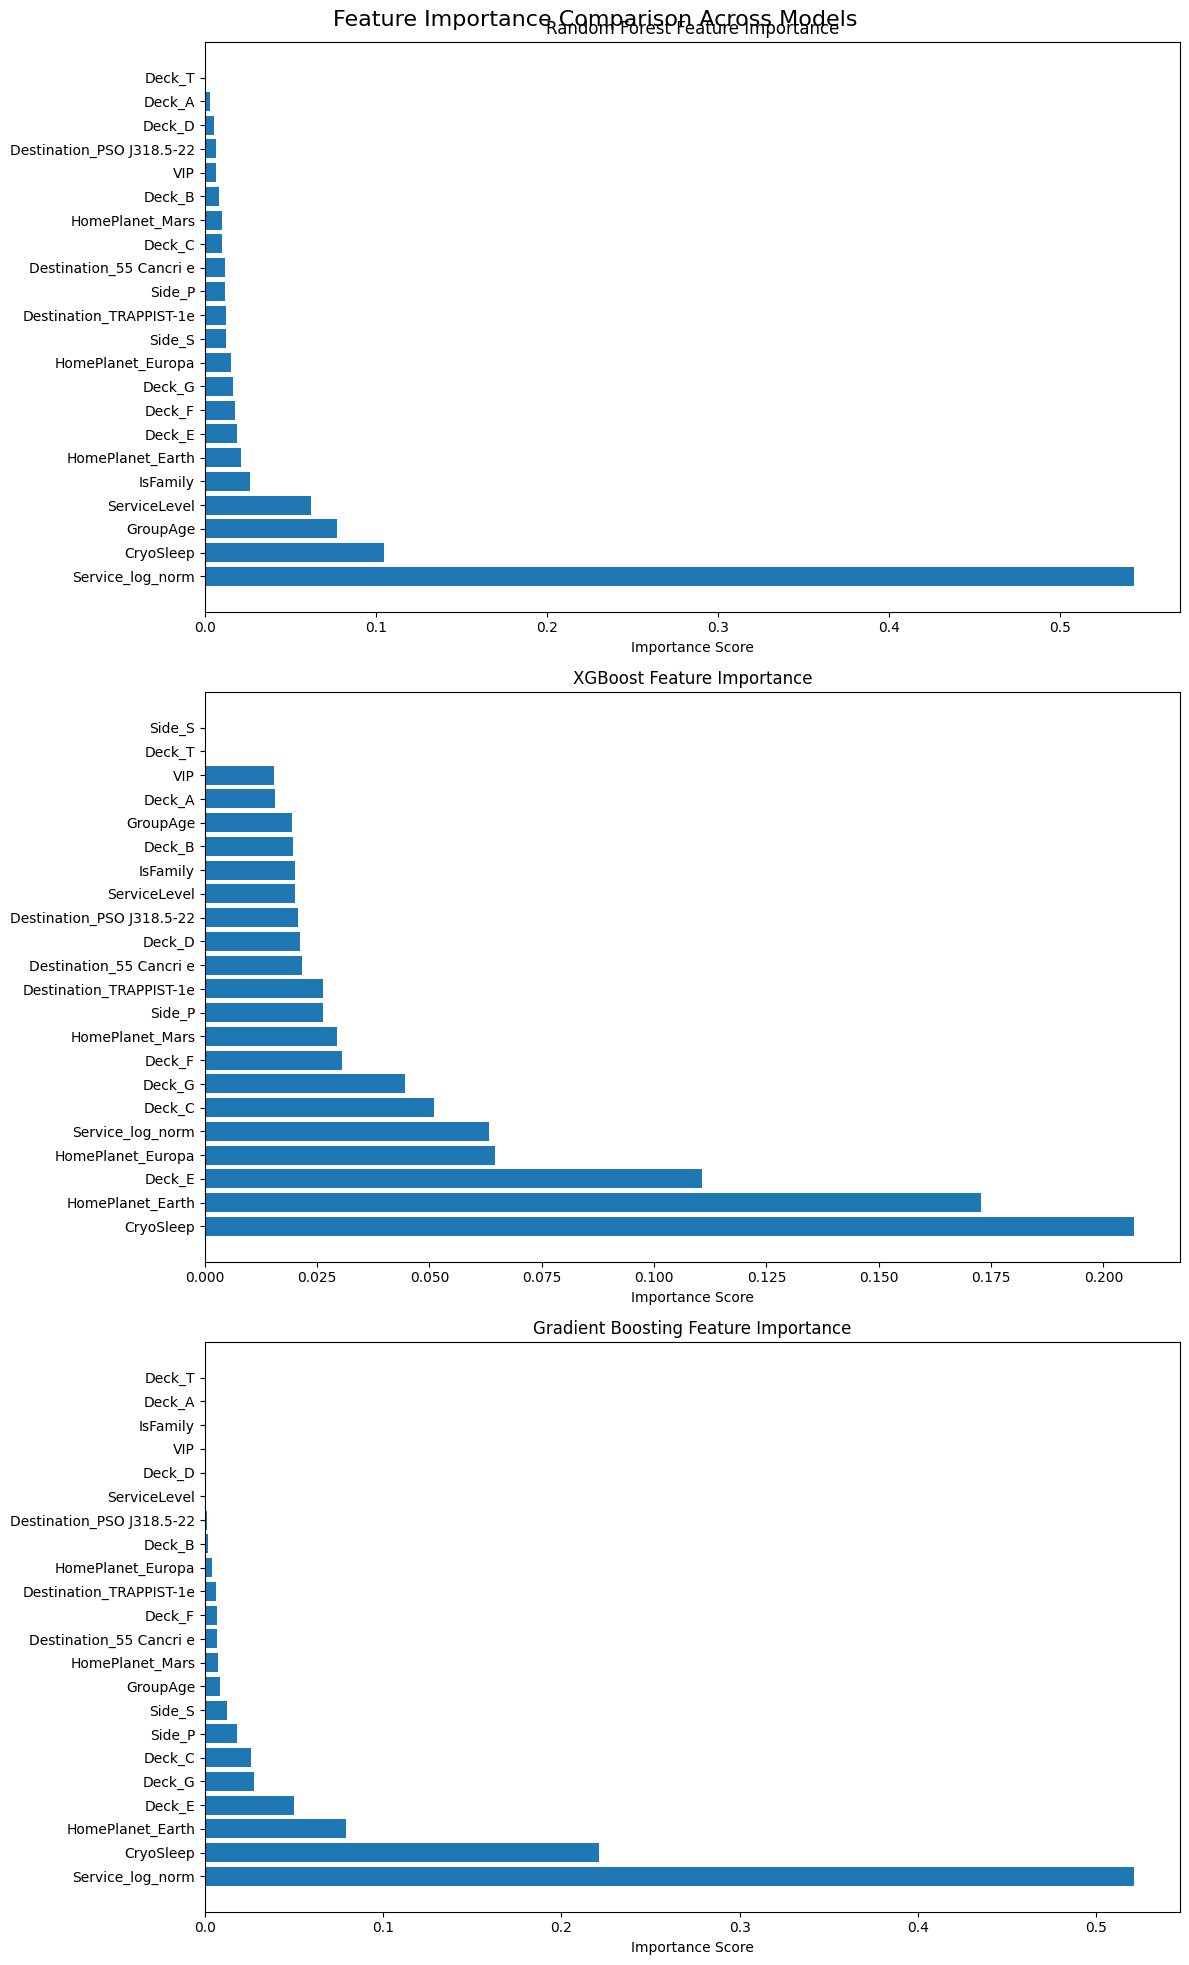


Top 5 Most Important Features by Model:

Random Forest:
Service_log_norm: 0.5427
CryoSleep: 0.1046
GroupAge: 0.0770
ServiceLevel: 0.0623
IsFamily: 0.0262

XGBoost:
CryoSleep: 0.2067
HomePlanet_Earth: 0.1728
Deck_E: 0.1107
HomePlanet_Europa: 0.0645
Service_log_norm: 0.0633

Gradient Boosting:
Service_log_norm: 0.5208
CryoSleep: 0.2213
HomePlanet_Earth: 0.0789
Deck_E: 0.0499
Deck_G: 0.0276


In [58]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Get feature names
feature_names = X.columns

# Get feature importance from different models
importances = {}

# Random Forest importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
importances['Random Forest'] = rf_model.feature_importances_

# XGBoost importance
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
importances['XGBoost'] = xgb_model.feature_importances_

# Gradient Boosting importance
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
importances['Gradient Boosting'] = gb_model.feature_importances_

# Create a figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 20))
fig.suptitle('Feature Importance Comparison Across Models', fontsize=16)

# Plot for each model
for idx, (model_name, importance) in enumerate(importances.items()):
    # Sort importance
    indices = np.argsort(importance)[::-1]
    
    # Plot
    axes[idx].barh(range(len(importance)), importance[indices])
    axes[idx].set_yticks(range(len(importance)))
    axes[idx].set_yticklabels(feature_names[indices])
    axes[idx].set_title(f'{model_name} Feature Importance')
    axes[idx].set_xlabel('Importance Score')

plt.tight_layout()
plt.show()

# Print top 5 most important features for each model
print("\nTop 5 Most Important Features by Model:")
for model_name, importance in importances.items():
    print(f"\n{model_name}:")
    indices = np.argsort(importance)[::-1]
    for i in range(5):
        print(f"{feature_names[indices[i]]}: {importance[indices[i]]:.4f}")